In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def get_signals(data: pd.DataFrame, horizon: int, alpha: float, ticker:str):
    """
    Generate trading signals based on future price movements.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing price data.
        horizon (int): The number of periods to look ahead for price movement.
        alpha (float): The threshold for generating buy/sell signals.

    Returns:
        pd.DataFrame: The DataFrame with an additional 'Signal' column.
    """

    data = data.copy()
    # Calculate future percentage change
    data['future_pct_change'] = data[ticker].pct_change(periods=horizon).shift(-horizon)

    # Generate signals
    data['signal'] = 0
    data.loc[data['future_pct_change'] > alpha, 'signal'] = 1
    data.loc[data['future_pct_change'] < -alpha, 'signal'] = -1

    # Clean up
    data.drop(columns=['future_pct_change'], inplace=True)

    return data


def signal_distribution(data: pd.DataFrame):
    """
    Print the distribution of trading signals in the DataFrame.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing trading signals.
    """

    counts = data['signal'].value_counts()
    pct = counts / len(data)

    print("Signal Distribution:")
    for signal, count in counts.items():
        print(f"Signal {signal}: Count = {count}, Percentage = {pct[signal]:.2%}")


def plot_price(data: pd.DataFrame, ticker: str):
    """
    Plot the closing price of the stock.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing price data.
        ticker (str): The stock ticker symbol.
    """

    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data[ticker], label=f'{ticker} Closing Price')
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
tickers = ['AAPL', 'NVDA', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'SBUX', 'JPM', 'AXP', 'MCD', 'KO', 
           'NFLX', 'CMG', 'CP', 'WMT', 'V', 'GLD', 'BLK', 'PG', 'JNJ', 'TMUS', 'MA', 'BX', 'LULU', 'DPZ', 'BAC', 
           'FDX', 'DIS', 'GE', 'HSY', 'HP', 'COST', 'HD', 'K', 'ADBE', 'CSCO', 'T', 'F', 'NKE', 'CVX', 'XOM', 
           'PEP', 'PFE', 'RL', 'AZN', 'VZ', 'WBD', 'HSBC']
df = yf.download(tickers, start='2010-10-28',
                       end='2025-10-28', interval='1d', auto_adjust=True)['Close']
df

[*********************100%***********************]  48 of 48 completed


Ticker,AAPL,ADBE,AMZN,AXP,AZN,BAC,BLK,BX,CMG,COST,...,RL,SBUX,T,TMUS,TSLA,V,VZ,WBD,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-28,9.163341,28.100000,8.342000,33.386784,14.320231,9.007682,114.134766,6.273259,4.208400,45.166843,...,72.891617,10.717487,7.394424,16.619528,1.412667,17.153399,15.197100,22.979050,13.175978,37.348209
2010-10-29,9.035456,28.150000,8.261500,33.581177,14.328750,8.945183,116.076263,6.377340,4.204200,45.145248,...,75.188896,10.842771,7.399609,16.732147,1.456000,17.537077,15.229921,22.825754,13.197906,37.500488
2010-11-01,9.131521,28.219999,8.129000,33.662178,14.183927,8.984246,116.660110,6.363148,4.221600,45.512039,...,74.862907,10.937689,7.451497,16.909122,1.427333,17.348606,15.192408,22.687786,13.232012,37.759922
2010-11-02,9.287023,29.020000,8.230500,34.334435,14.269114,8.906118,117.467949,6.618620,4.304200,45.828499,...,75.282028,10.964261,7.508578,17.343513,1.416667,17.595413,15.379976,22.733776,13.348959,38.261879
2010-11-03,9.390294,28.799999,8.423500,34.075260,14.294670,8.999869,112.457962,6.708508,4.386400,45.425739,...,74.994881,11.047787,7.539717,17.440044,1.451333,17.725548,15.469068,21.768011,13.378198,38.335201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-21,262.769989,357.549988,222.029999,355.220001,83.220001,51.520000,1130.000000,161.429993,42.360001,936.175537,...,334.980011,85.900002,26.049999,229.080002,442.600006,347.209991,40.299999,20.330000,106.220001,112.709999
2025-10-22,258.450012,354.089996,217.949997,352.000000,83.430000,51.099998,1129.680054,161.720001,41.610001,943.345398,...,332.119995,85.500000,25.549999,227.399994,438.970001,345.359985,39.799999,20.530001,107.139999,114.709999
2025-10-23,259.579987,354.119995,221.089996,354.929993,83.400002,51.759998,1125.000000,154.979996,41.799999,940.719116,...,336.290009,85.440002,24.620001,219.990005,448.980011,345.959991,38.400002,21.250000,106.860001,115.980003


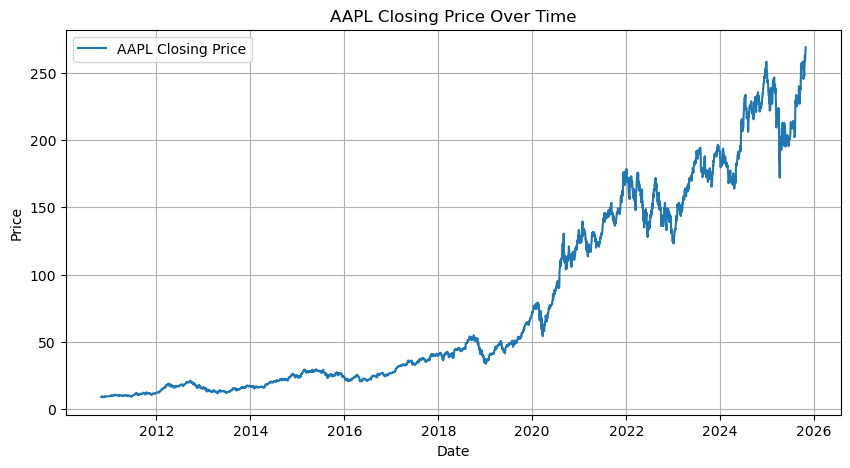

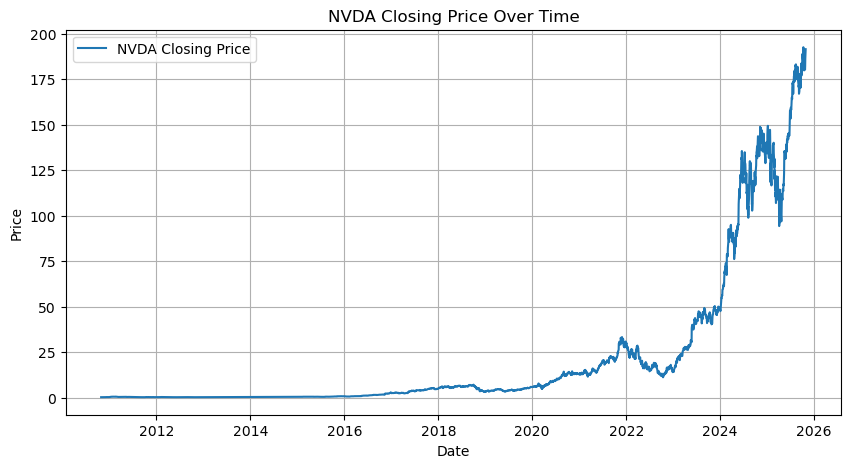

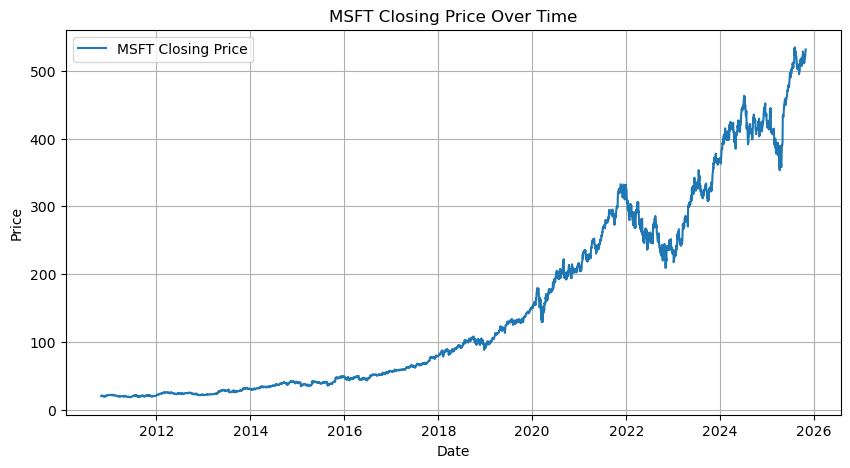

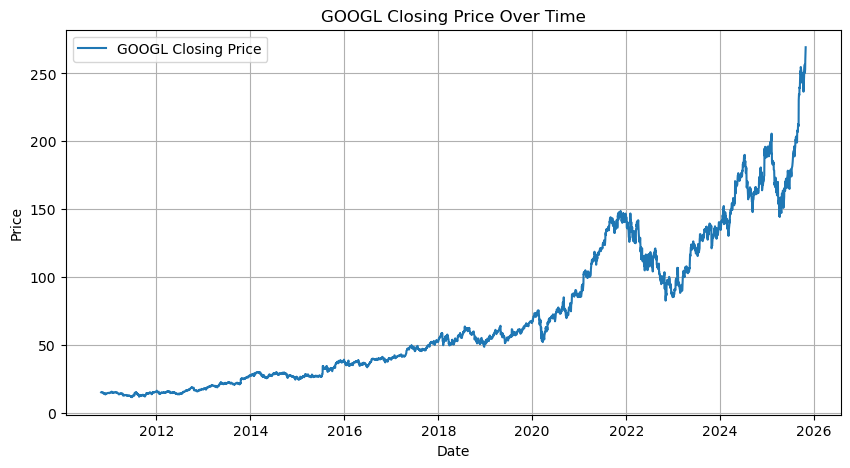

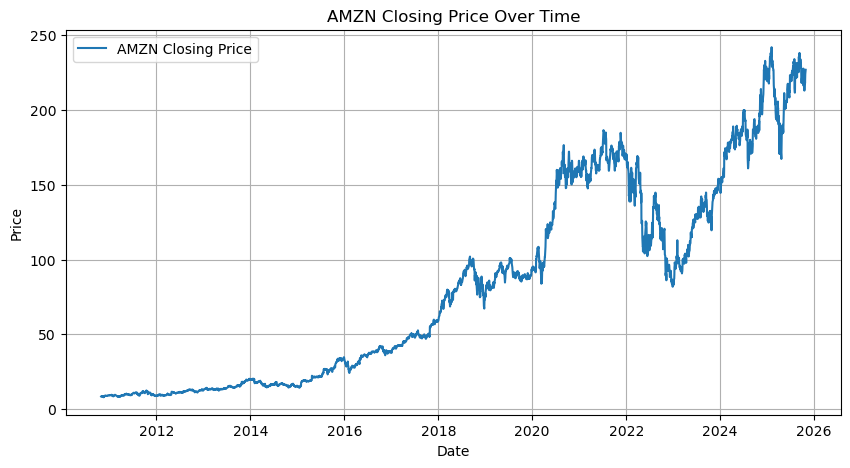

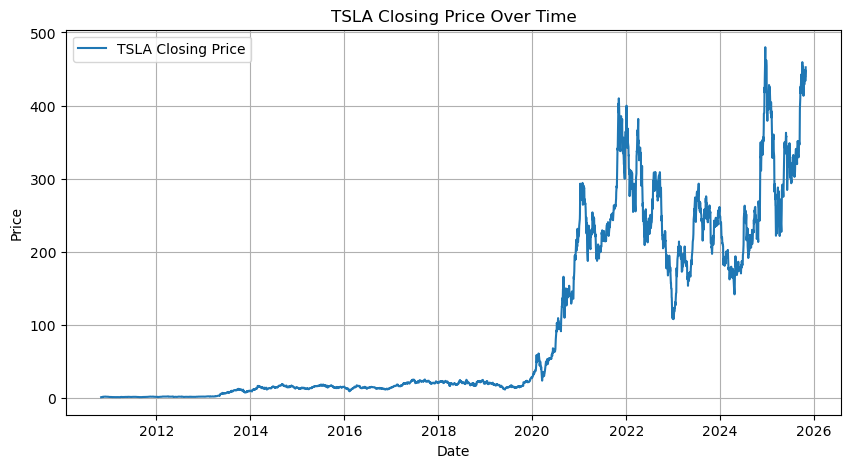

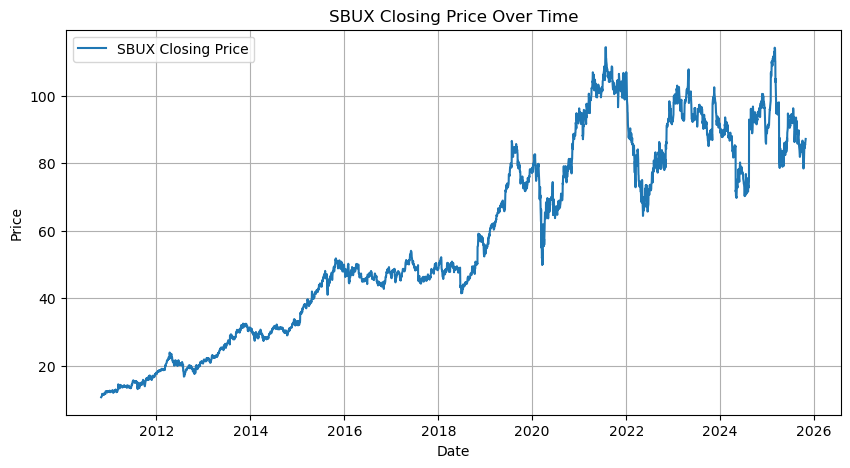

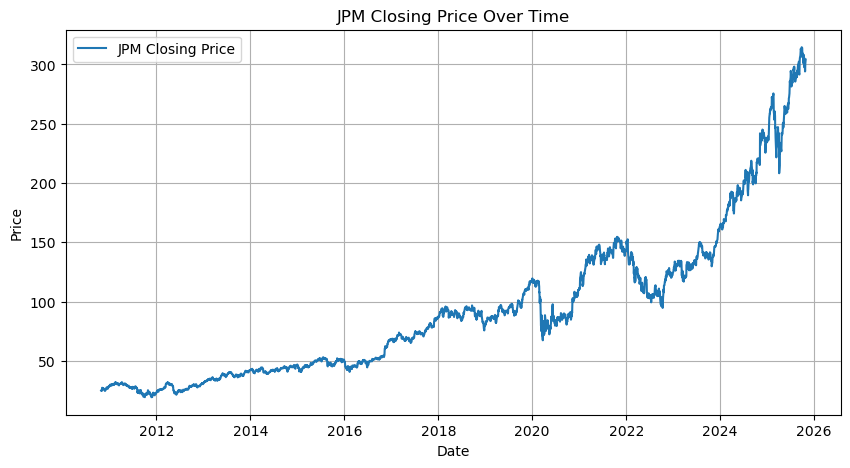

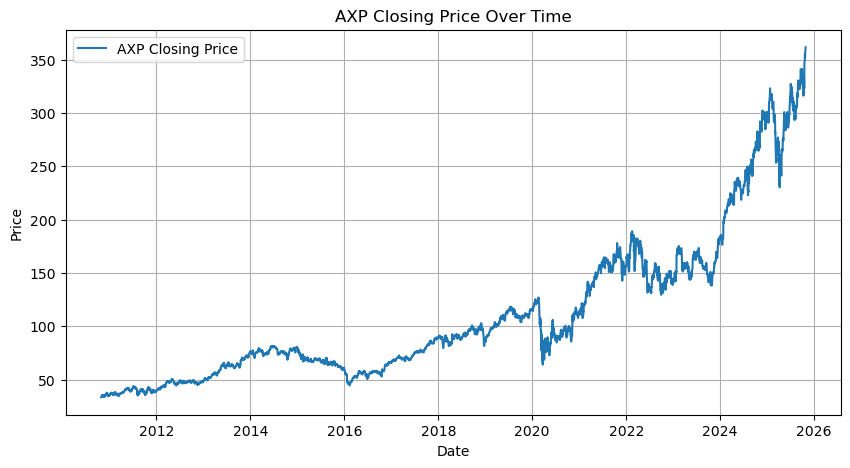

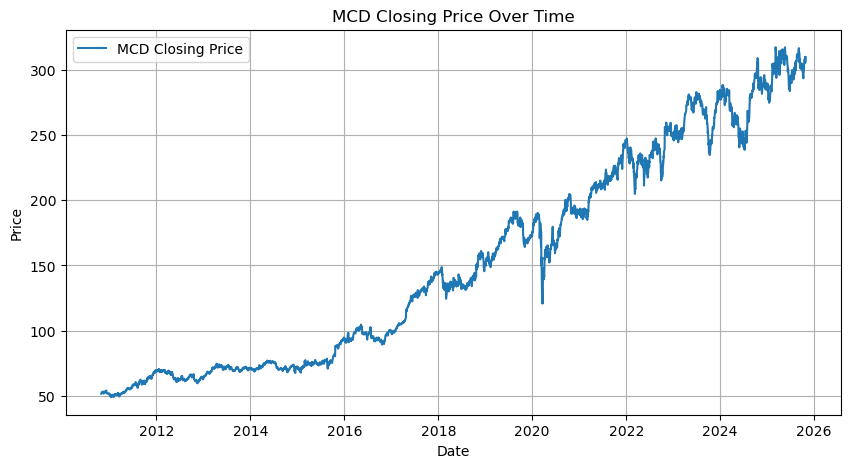

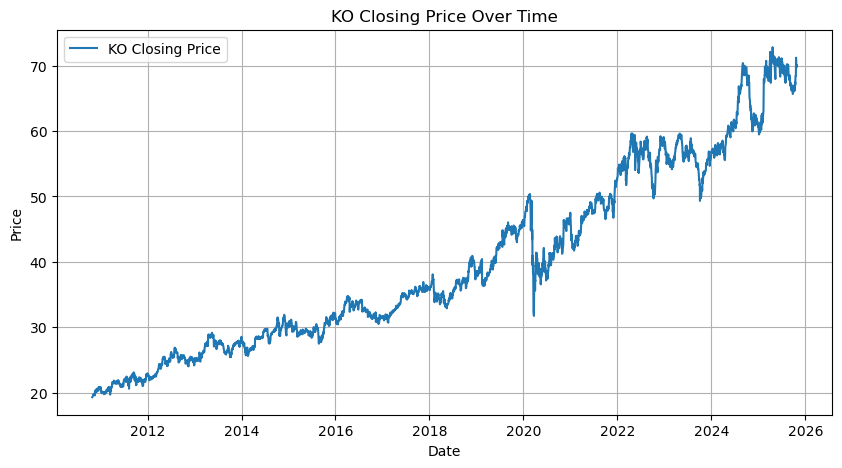

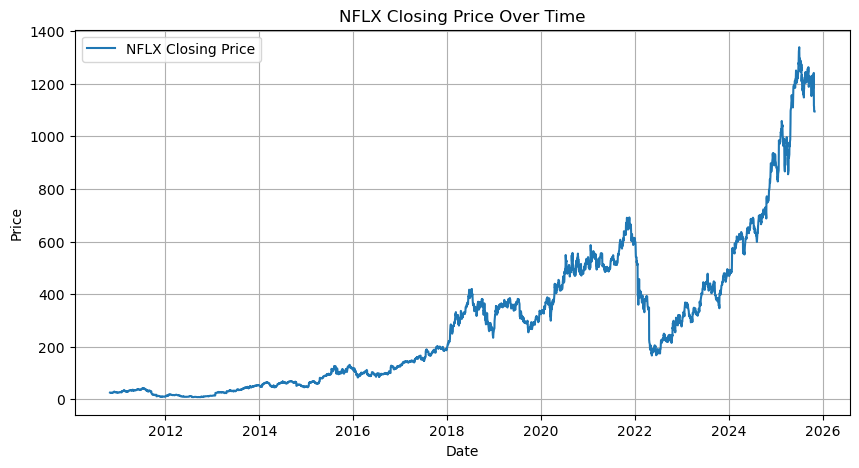

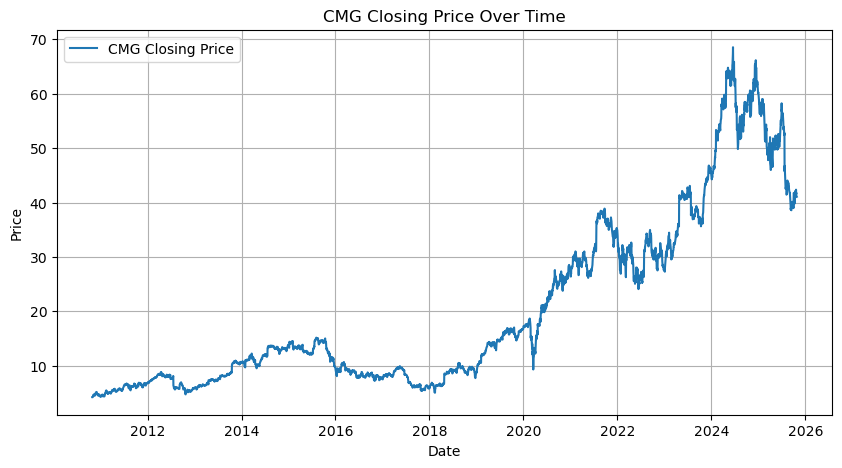

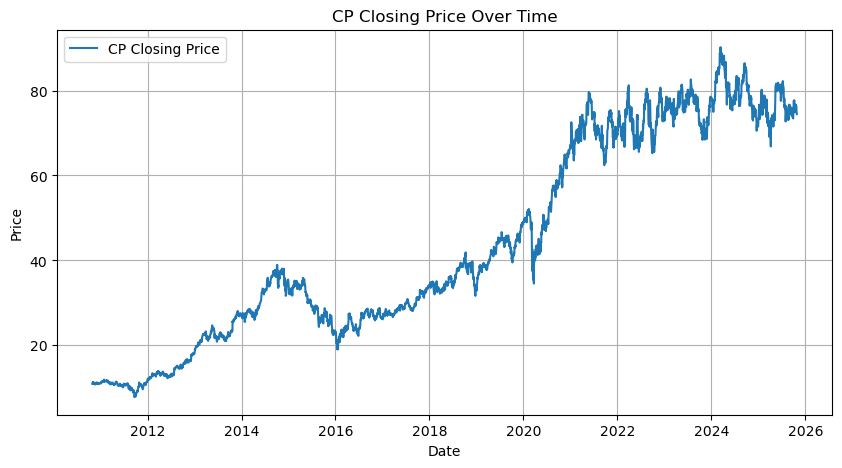

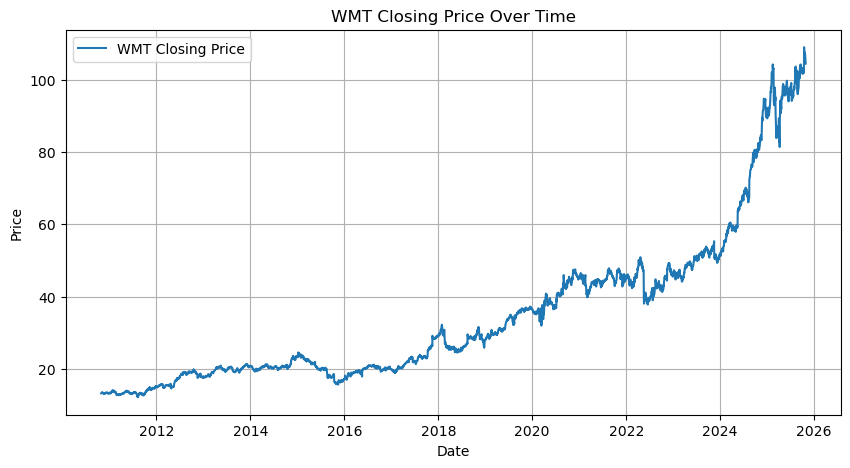

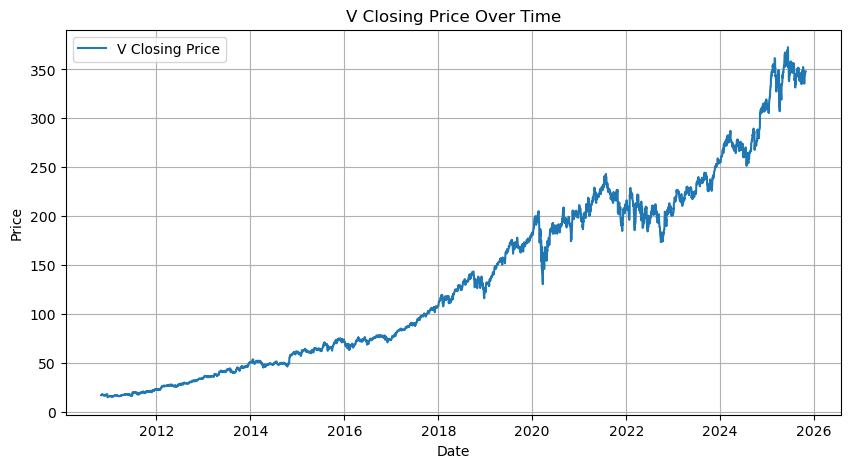

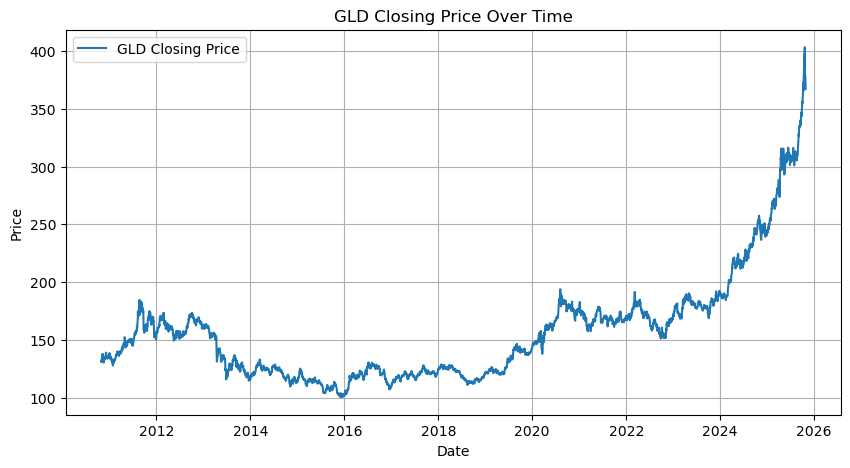

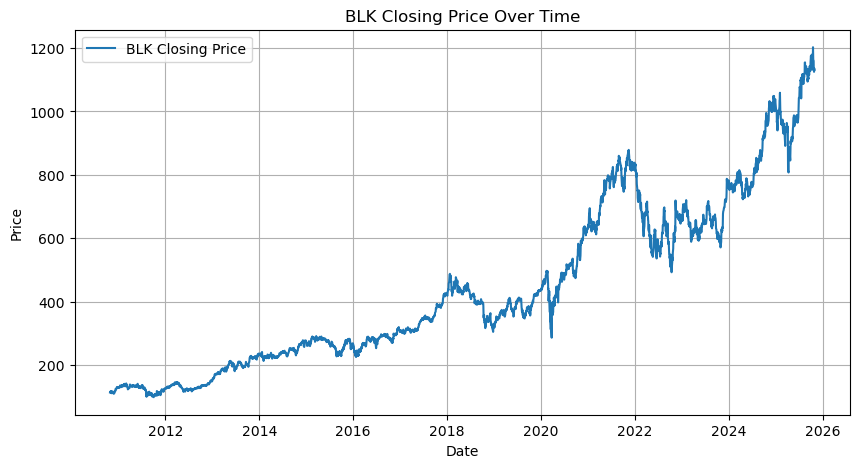

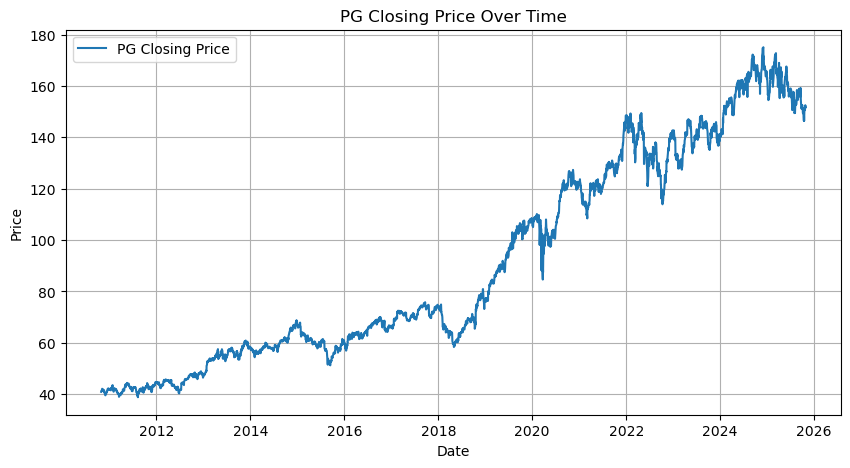

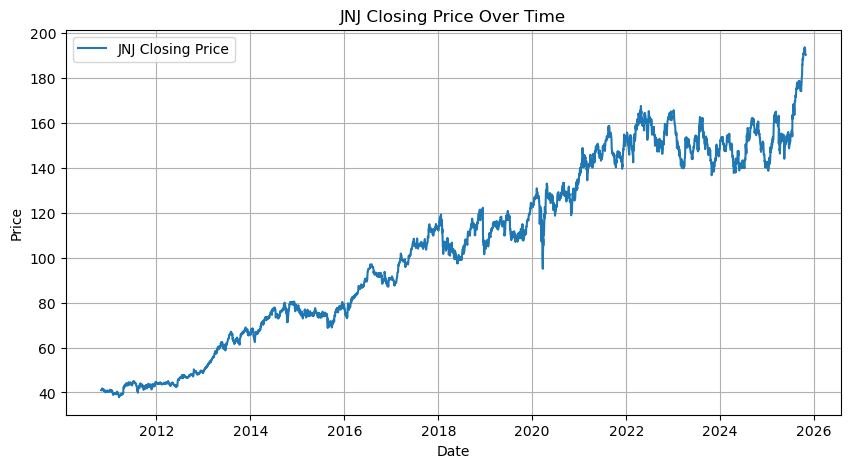

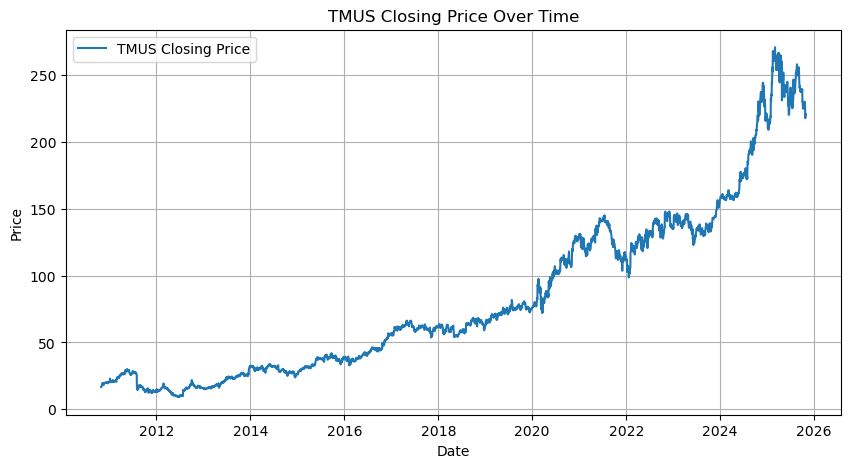

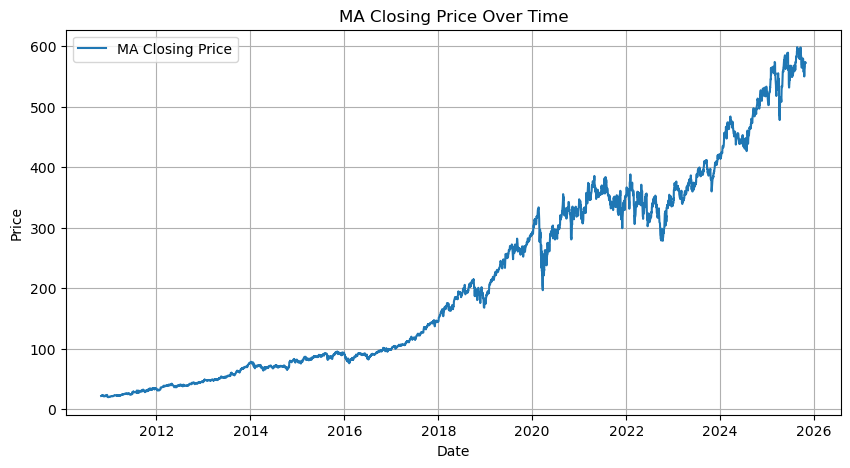

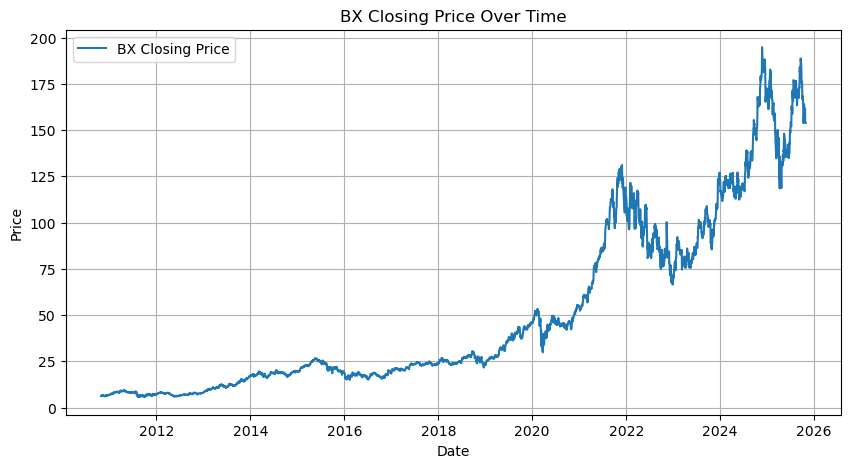

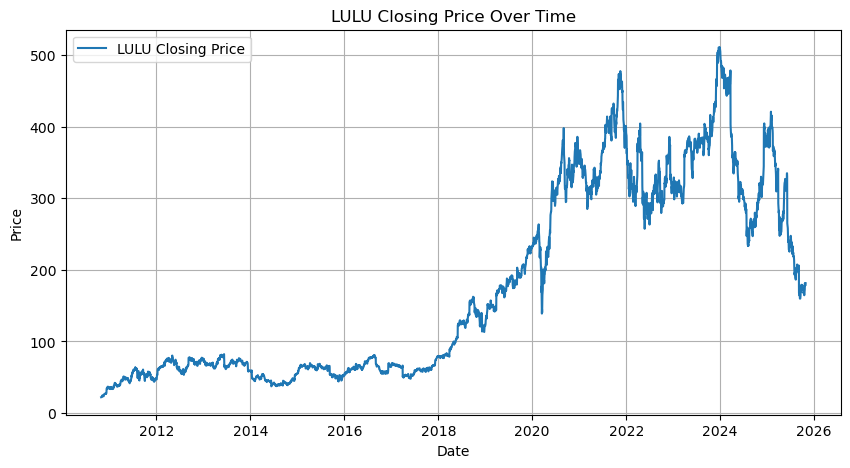

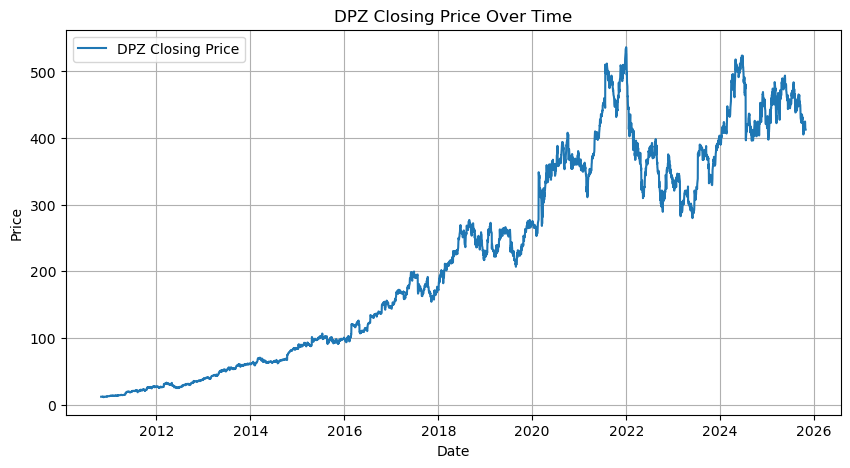

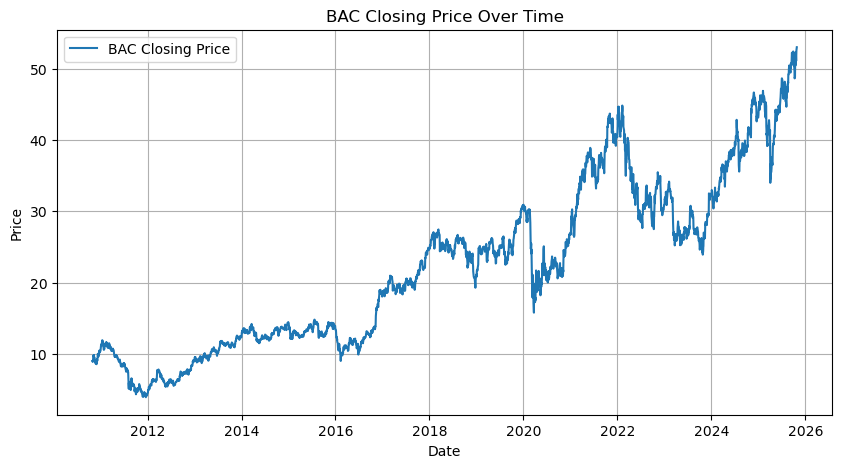

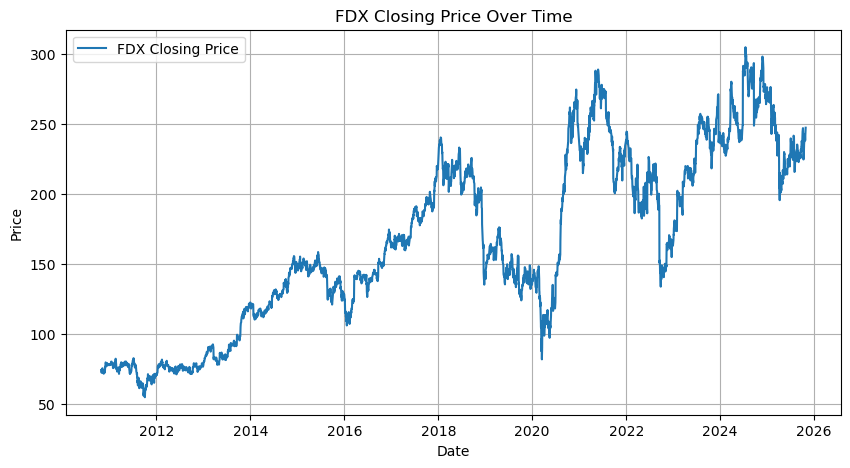

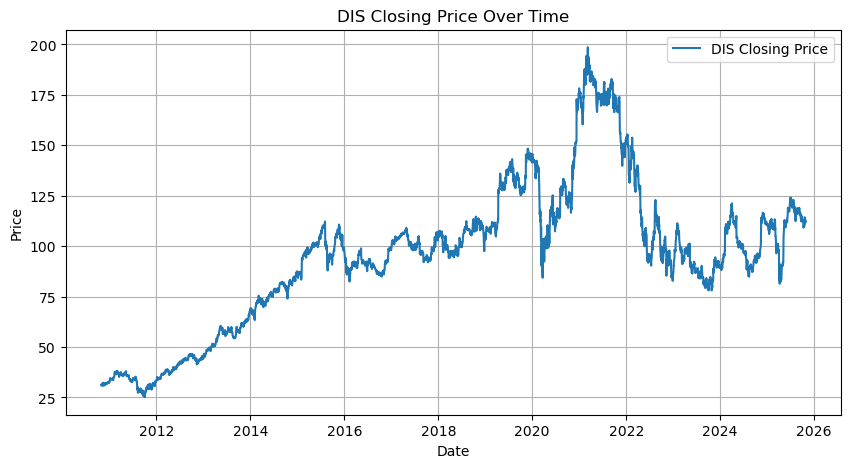

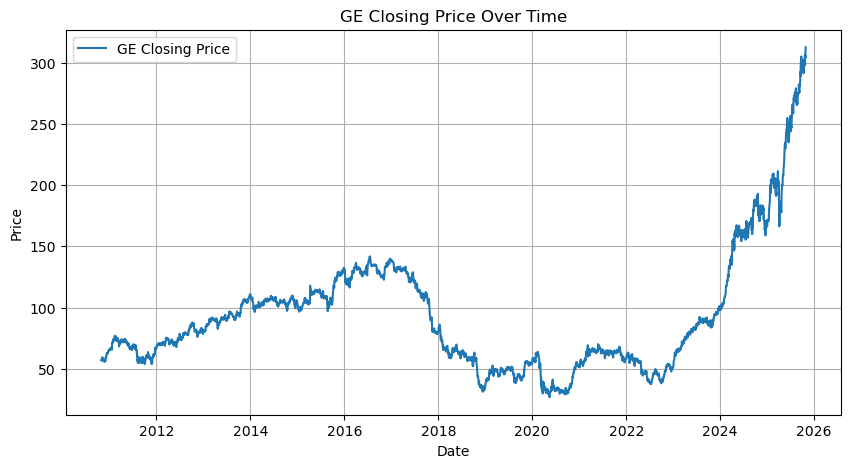

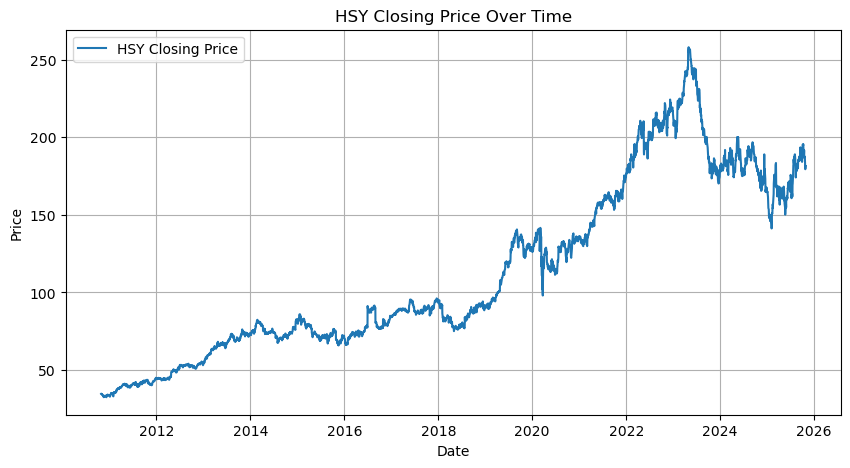

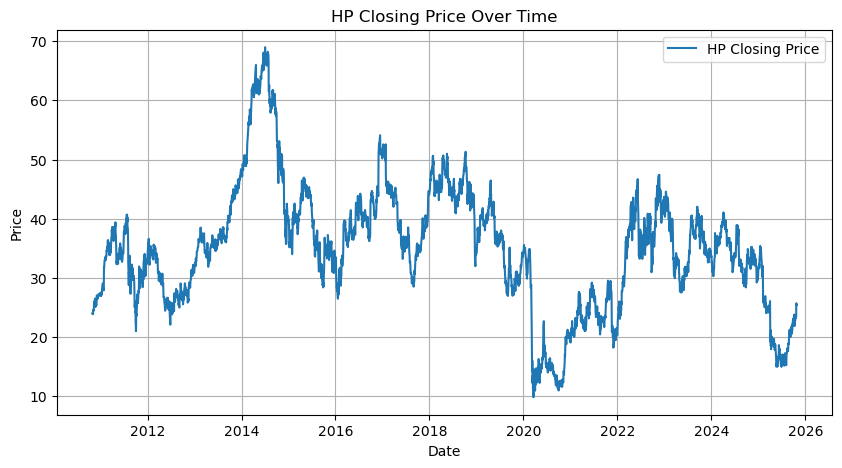

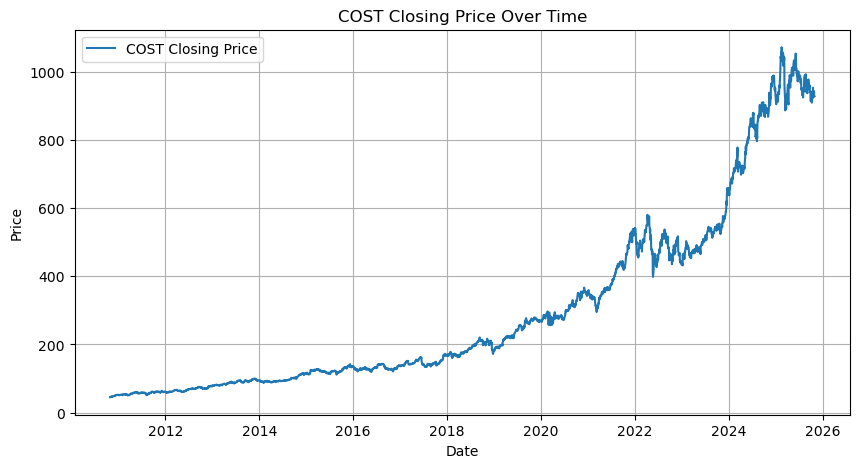

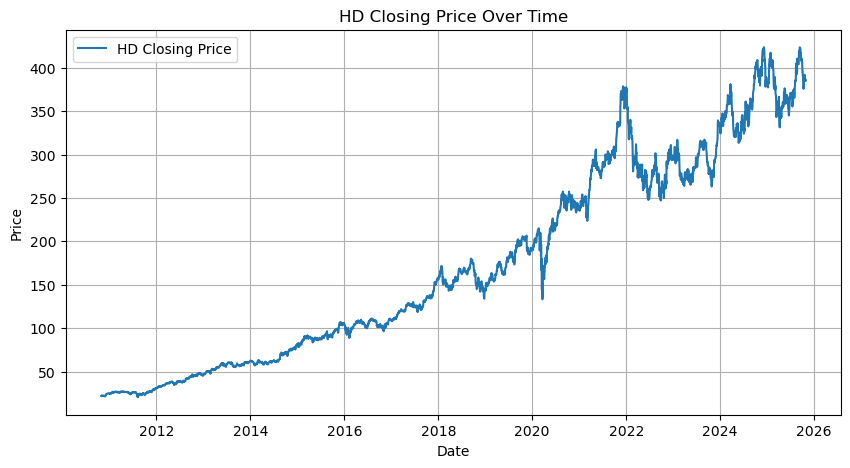

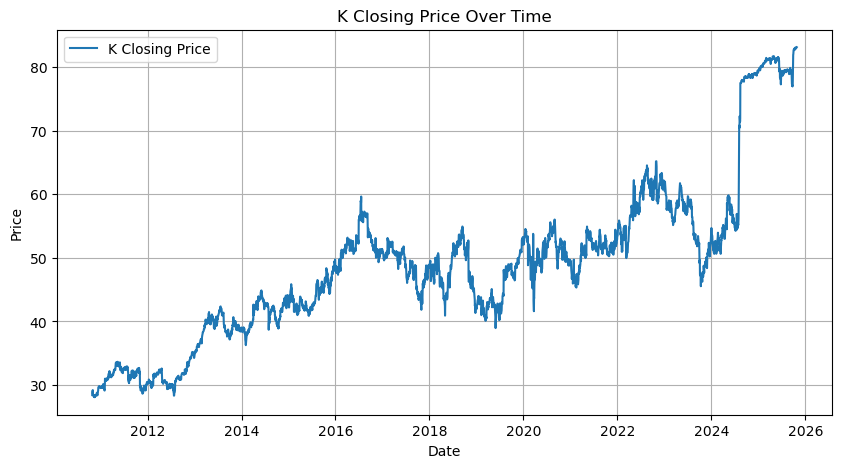

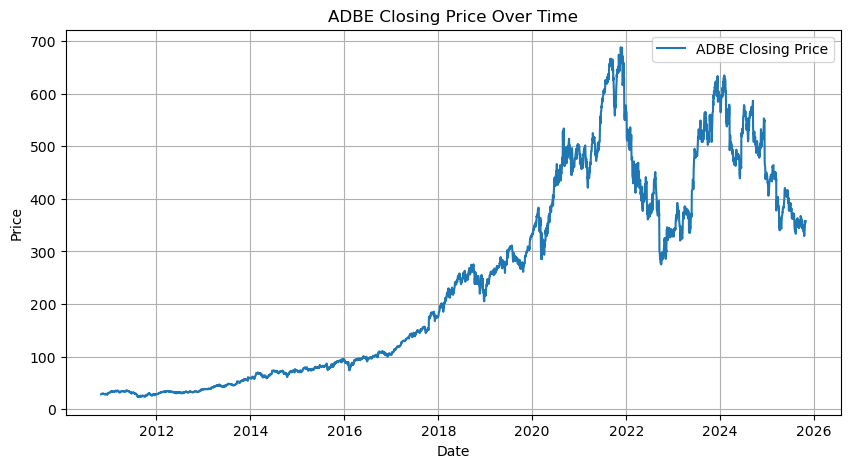

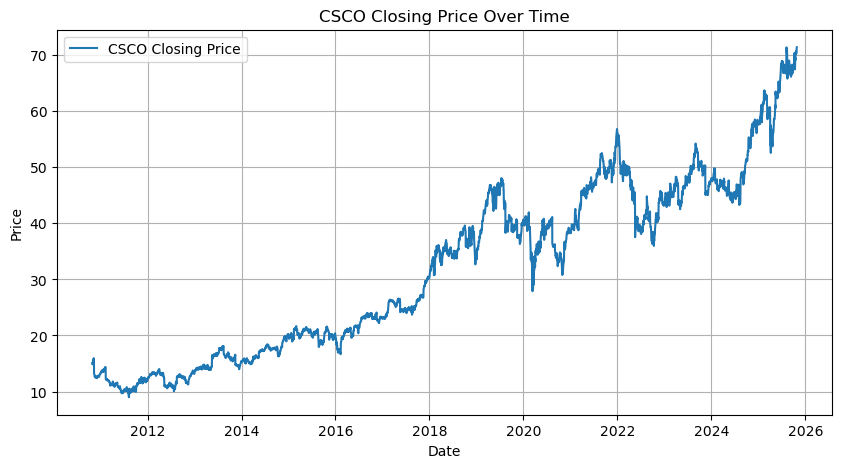

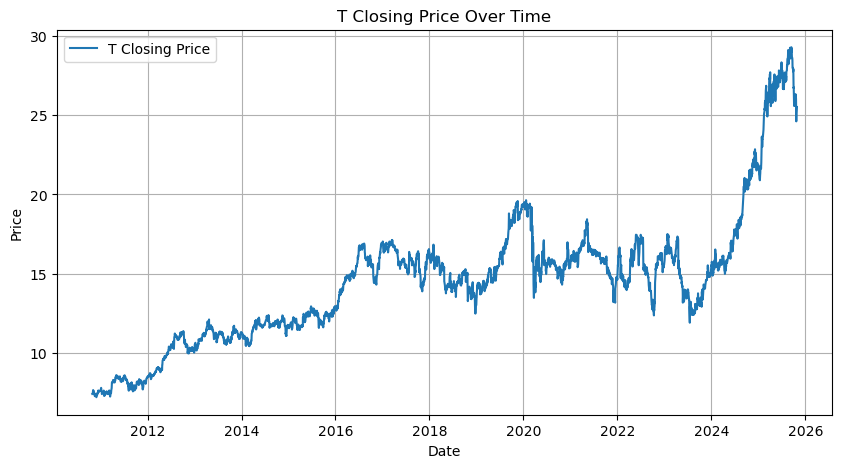

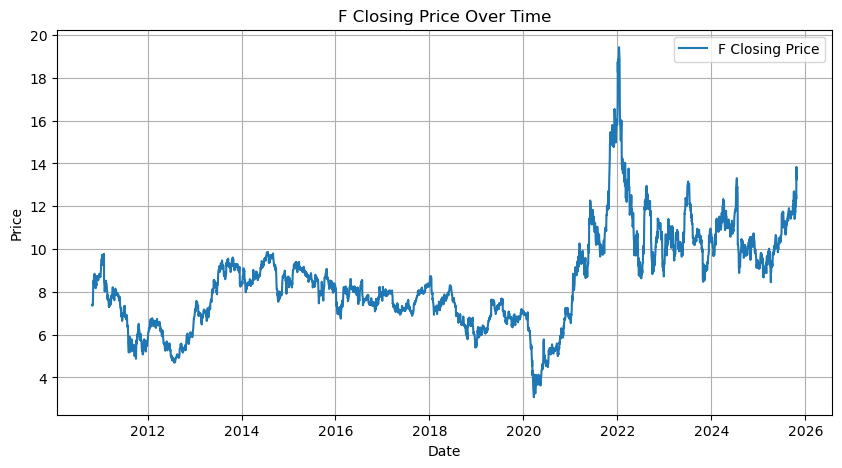

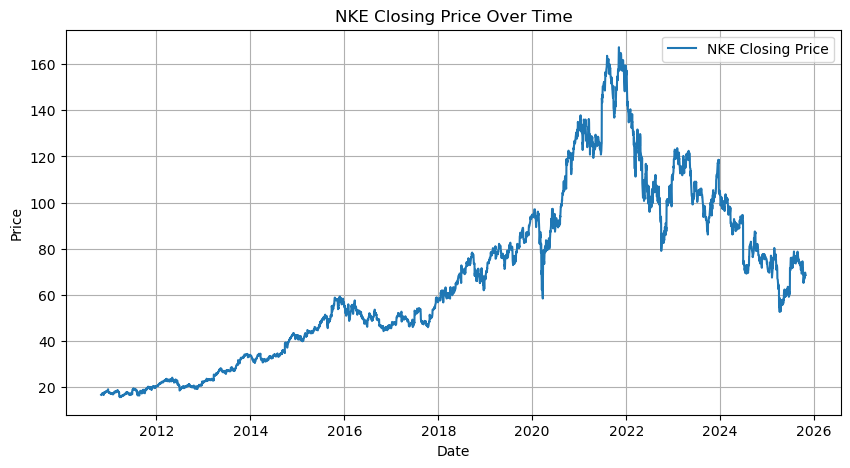

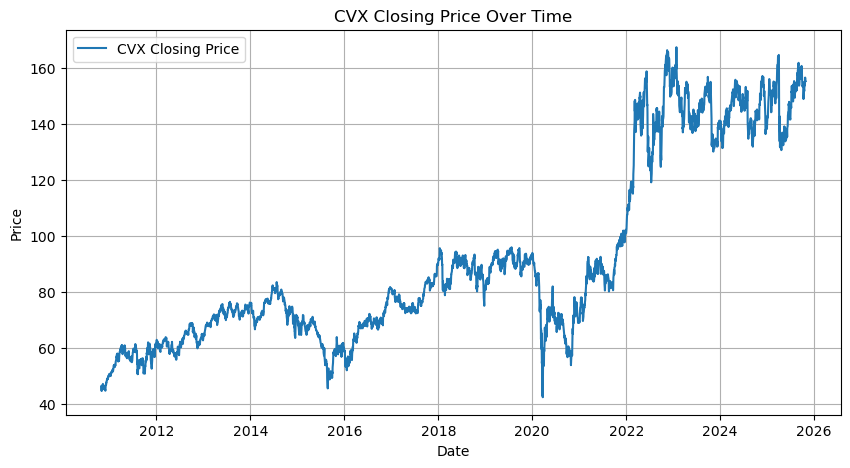

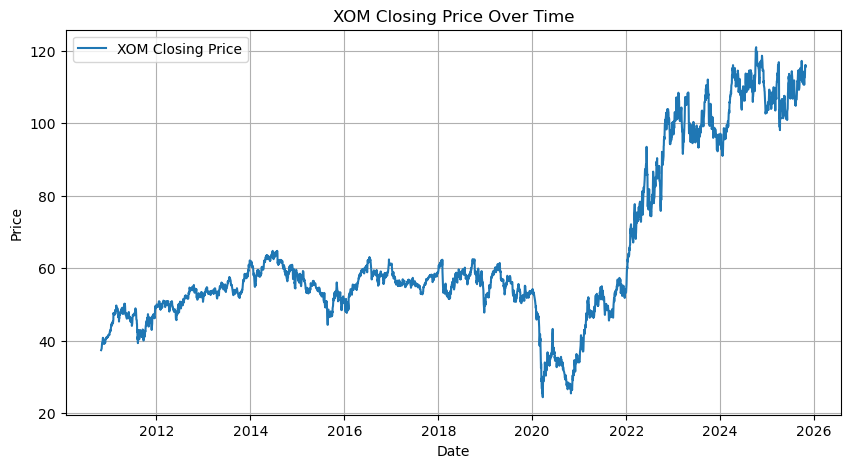

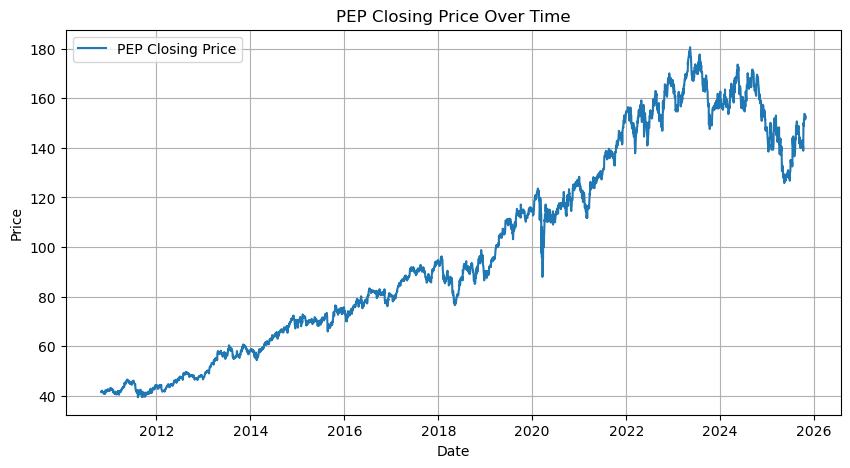

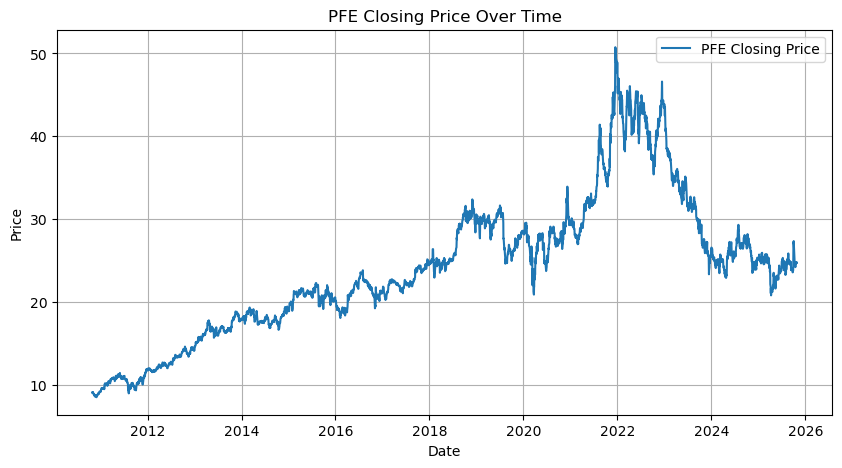

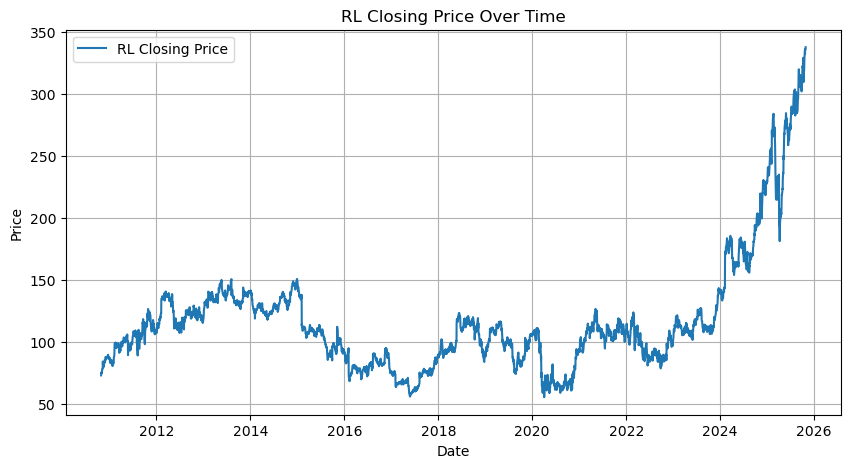

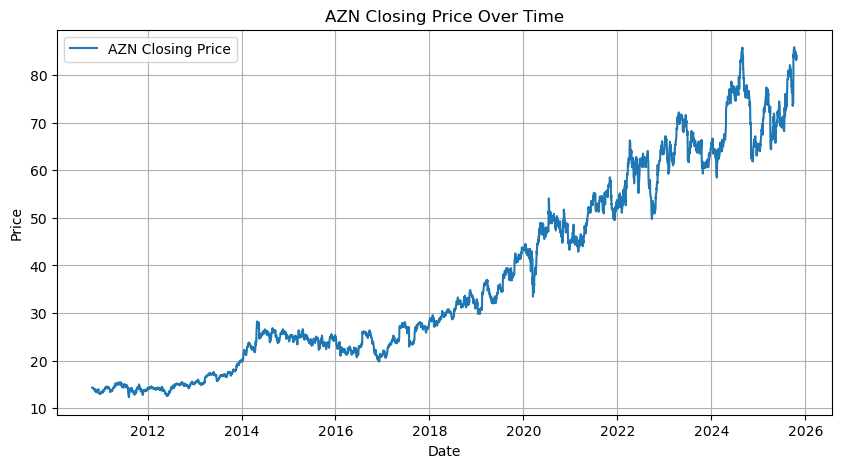

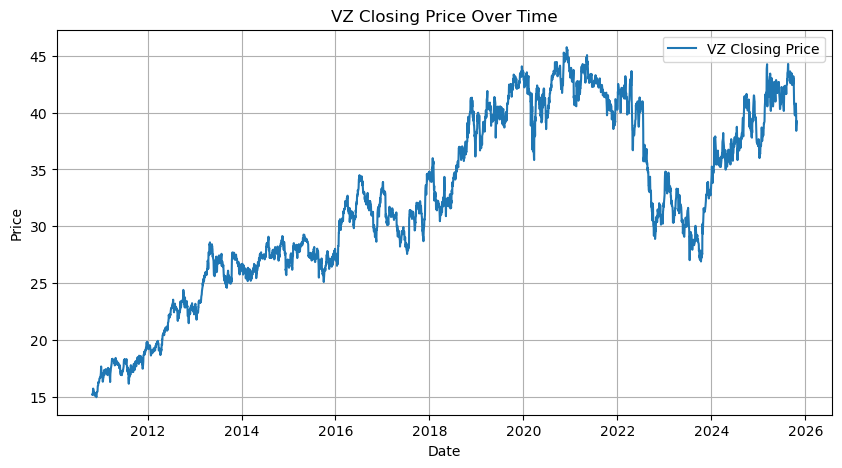

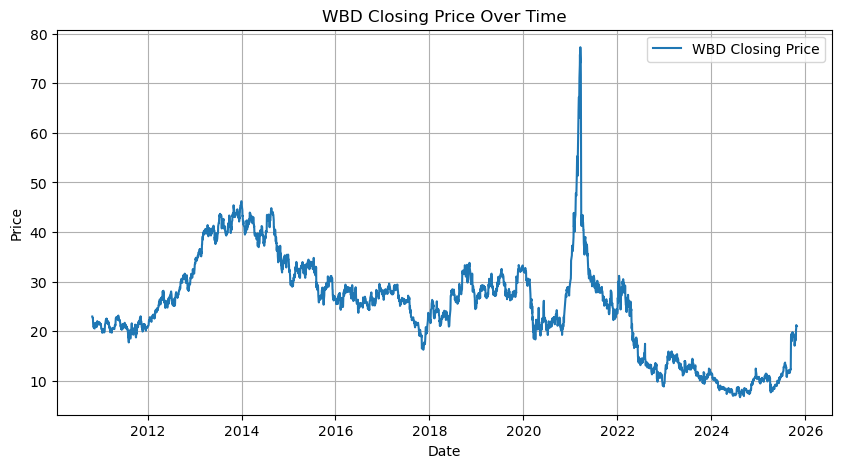

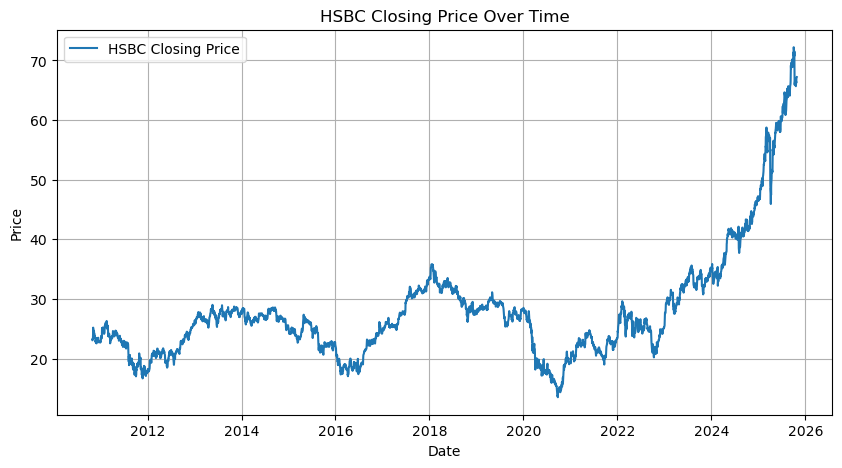

In [4]:
for ticker in tickers:
    plot_price(df, ticker)

In [5]:
horizon = 5
alpha = 0.01
# Base alpha 0.02
# HP, LULU, RL, VZ (0.01), XOM, KO, PFE
ticker = 'PFE'
df = get_signals(df, horizon, alpha, ticker)
signal_distribution(df)

Signal Distribution:
Signal 1: Count = 1375, Percentage = 36.45%
Signal 0: Count = 1242, Percentage = 32.93%
Signal -1: Count = 1155, Percentage = 30.62%
